In [14]:
import os, shutil
original_dataset_dir = 'D:\AI_ML\Dog_vs_Cat\petImages'
base_dir = 'D:\AI_ML\Dog_vs_Cat\dogs_and_cats_small'
#This and subsequent if statements serve to prevent the remaking of directories
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

#Loading cat images into train, validation, and test directories
fnames = ['cat({}).jpg'.format(i) for i in range(1, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat({}).jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat({}).jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


#Loading dog images into train, validation, and test directories
fnames = ['dog({}).jpg'.format(i) for i in range(1, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog({}).jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog({}).jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [15]:
print('total cat training images: ', len(os.listdir(train_cats_dir)))
print('total dog training images: ', len(os.listdir(train_dogs_dir)))
print('total cat validation images: ', len(os.listdir(validation_cats_dir)))
print('total dog validation images: ', len(os.listdir(validation_dogs_dir)))
print('total cat test images: ', len(os.listdir(test_cats_dir)))
print('total dog test images: ', len(os.listdir(test_dogs_dir)))

total cat training images:  999
total dog training images:  999
total cat validation images:  500
total dog validation images:  500
total cat test images:  500
total dog test images:  500


In [16]:
import keras
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

#Changed Conv2D to SeparableConv2D, optimizer to rmsprop, and loss to categorical_crossentropy
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#Adding dropout to help combat overfitting
model.add(layers.Dropout(0.5))
#Forgot to add Dense layer in previous version
model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))


In [17]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=0.001), metrics=['acc'])

#Adding data augmentation to help combat overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=True)
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=True)
model.summary()

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
____________________________________

In [18]:
history = model.fit_generator(train_generator, steps_per_epoch=50, epochs=50, validation_data=validation_generator, validation_steps=50)

model.save('dogs_and_cats_small_7.h5')

Epoch 1/50
50/50 [==============================] - 17s 331ms/step - loss: 0.8074 - acc: 0.5645 - val_loss: 0.7034 - val_acc: 0.4949
Epoch 2/50
50/50 [==============================] - 5s 103ms/step - loss: 0.7260 - acc: 0.6207 - val_loss: 0.9523 - val_acc: 0.4987
Epoch 3/50
50/50 [==============================] - 5s 97ms/step - loss: 0.6802 - acc: 0.6506 - val_loss: 0.9282 - val_acc: 0.5044
Epoch 4/50
50/50 [==============================] - 5s 98ms/step - loss: 0.6101 - acc: 0.6808 - val_loss: 1.0073 - val_acc: 0.5052
Epoch 5/50
50/50 [==============================] - 5s 94ms/step - loss: 0.5905 - acc: 0.6941 - val_loss: 0.6327 - val_acc: 0.4962
Epoch 6/50
50/50 [==============================] - 6s 116ms/step - loss: 0.5404 - acc: 0.7212 - val_loss: 0.7219 - val_acc: 0.5064
Epoch 7/50
50/50 [==============================] - 5s 104ms/step - loss: 0.5369 - acc: 0.7345 - val_loss: 0.8219 - val_acc: 0.5254
Epoch 8/50
50/50 [==============================] - 6s 113ms/step - loss: 0.50

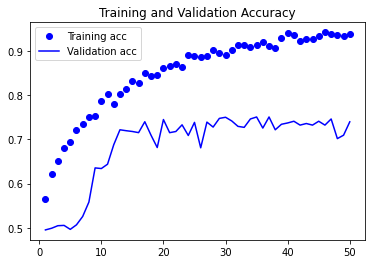

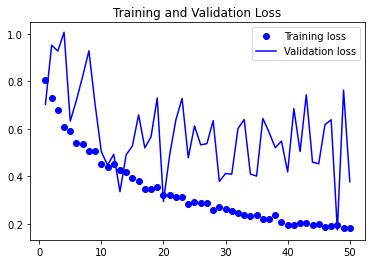

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [20]:
from keras.preprocessing import image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

img_path = 'D:\AI_ML\Dog_vs_Cat\dogs_and_cats_small\\test\cats\cat(1630).jpg'
img_path2 = 'D:\AI_ML\Dog_vs_Cat\dogs_and_cats_small\\test\dogs\dog(1680).jpg'
image_paths = []
for i in range(10):
    if i % 2:
        image_paths.append('D:\AI_ML\Dog_vs_Cat\PetImages\\cat(' + '%s' % (i + 1) + ').jpg')
    else:
        image_paths.append('D:\AI_ML\Dog_vs_Cat\PetImages\\dog(' + '%s' % (i  + 1) + ').jpg')

images = []
for j in range(len(image_paths)):
    images.append(image.img_to_array(image.load_img(image_paths[j], target_size=(150,150))) / 255.)
    images[j] = np.expand_dims(images[j], axis=0)

# x = image.img_to_array(image.load_img(img_path, target_size=(150,150))) / 255.
# x = np.expand_dims(x, axis=0)

# y = image.img_to_array(image.load_img(img_path2, target_size=(150,150))) / 255.
# y = np.expand_dims(y, axis=0)

This is a dog


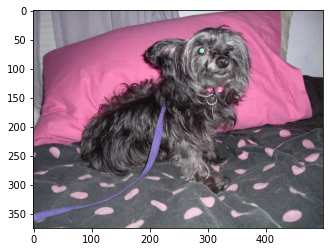

Predicted: [[0.9888387]]
This is a cat


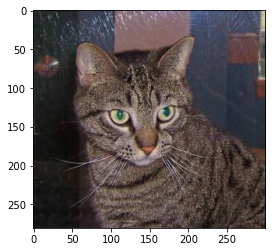

Predicted: [[0.10867869]]
This is a dog


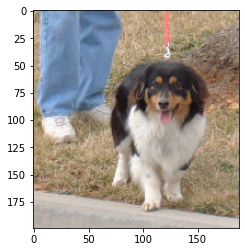

Predicted: [[0.92596084]]
This is a cat


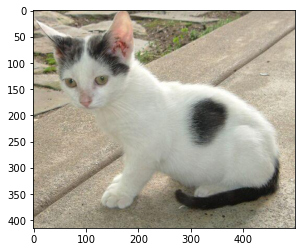

Predicted: [[0.3203186]]
This is a dog


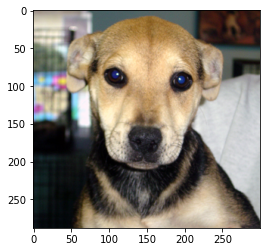

Predicted: [[0.99425644]]
This is a cat


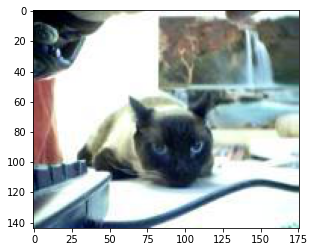

Predicted: [[0.13244212]]
This is a dog


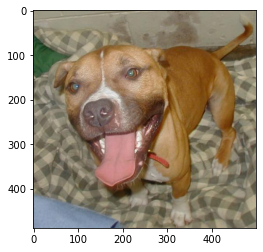

Predicted: [[0.99447507]]
This is a cat


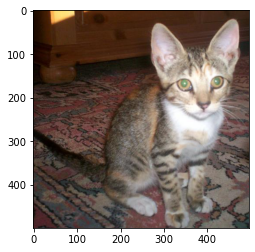

Predicted: [[0.04297455]]
This is a dog


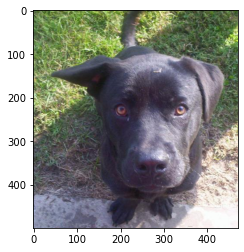

Predicted: [[0.9900703]]
This is a cat


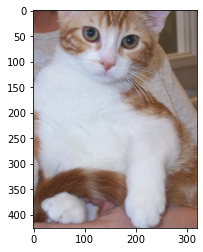

Predicted: [[0.00282465]]


In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator

for x in range(len(images)):
    preds = model.predict(images[x])
    if preds > 0.5:
        print('This is a dog')
    else:
        print('This is a cat')
    displayImg = mpimg.imread(image_paths[x])
    imgplot = plt.imshow(displayImg)
    plt.show()
    print('Predicted:', preds)


# preds = model.predict(x, batch_size=1)
# if preds > 0.5:
#     print('This is a dog')
# else:
#     print('This is a cat')
# displayImg = mpimg.imread(img_path)
# imgplot = plt.imshow(displayImg)
# plt.show()
# print('Predicted:', preds)

# preds2 = model.predict(y)
# if preds2 > 0.5:
#     print('This is a dog')
# else:
#     print('This is a cat')
# displayImg2 = mpimg.imread(img_path2)
# imgplot = plt.imshow(displayImg2)
# plt.show()
# print('Predicted:', preds2)
# print(preds)
# print(preds2)